In [1]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [2]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [3]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df_images = sparql.select_as_dataframe(q)
df_images

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,year,flag
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00260,"CK_Venus Lines and Motion, CK_Mercury Lines an...",http://sphaera.mpiwg-berlin.mpg.de/id/item/1ae...,1938,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Content, Original Part",100,Ferrara,1472,nan
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00671,CK_Relation Between the Spheres of Water and E...,http://sphaera.mpiwg-berlin.mpg.de/id/item/1ae...,1938,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Content, Original Part",100,Ferrara,1472,nan
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_03248,CK_Zodiac,http://sphaera.mpiwg-berlin.mpg.de/id/item/1ae...,1938,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Content, Original Part",100,Ferrara,1472,nan
3,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01971,"CK_Horizon, CK_Right and Oblique Sphere, CK_Su...",http://sphaera.mpiwg-berlin.mpg.de/id/item/1ae...,1938,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Content, Original Part",100,Ferrara,1472,nan
4,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_03900,CK_Lunar Eclipse,http://sphaera.mpiwg-berlin.mpg.de/id/item/1ae...,1938,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Content, Original Part",100,Ferrara,1472,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
20865,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01094,CK_Planetary Aspects,http://sphaera.mpiwg-berlin.mpg.de/id/item/237...,2271,http://sphaera.mpiwg-berlin.mpg.de/id/part/1d1...,Blebel's four books on the Sphere,"Original Part, Content",503,Wittenberg,1576,nan
20866,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00135,CK_Introduction to Geometry,http://sphaera.mpiwg-berlin.mpg.de/id/item/237...,2271,http://sphaera.mpiwg-berlin.mpg.de/id/part/1d1...,Blebel's four books on the Sphere,"Original Part, Content",503,Wittenberg,1576,nan
20867,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00282,CK_Celestial Coordinates,http://sphaera.mpiwg-berlin.mpg.de/id/item/237...,2271,http://sphaera.mpiwg-berlin.mpg.de/id/part/8e0...,Blebel's treatise to calculate distances betwe...,"Original Part, Content",504,Wittenberg,1576,nan
20868,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00282,CK_Celestial Coordinates,http://sphaera.mpiwg-berlin.mpg.de/id/item/237...,2271,http://sphaera.mpiwg-berlin.mpg.de/id/part/8e0...,Blebel's treatise to calculate distances betwe...,"Original Part, Content",504,Wittenberg,1576,nan


C:\Users\nogas\AppData\Local\Temp\ipykernel_24192\3514829029.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_counts = df_images.groupby('year_interval')['images'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_24192\3514829029.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_bid_counts = df_images.groupby('year_interval')['bid'].nunique()


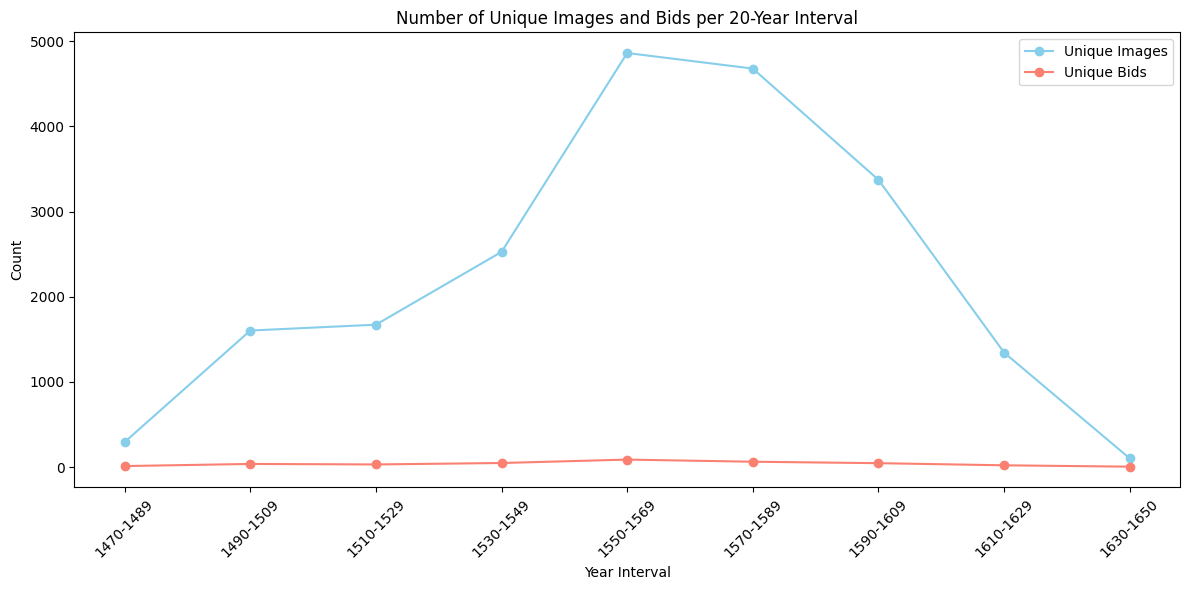

In [4]:
# Convert 'year' to numeric if it's not already
df_images['year'] = pd.to_numeric(df_images['year'], errors='coerce')

# Define the bins and labels for 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1650']

# Add a new column for binned intervals
df_images['year_interval'] = pd.cut(df_images['year'], bins=bins, labels=labels, right=False)

# Compute the number of unique images and unique bids per interval
unique_images_counts = df_images.groupby('year_interval')['images'].nunique()
unique_bid_counts = df_images.groupby('year_interval')['bid'].nunique()

# Plot the results
plt.figure(figsize=(12, 6))

# Plot for unique images
plt.plot(unique_images_counts.index, unique_images_counts.values, marker='o', color='skyblue', label='Unique Images')

# Plot for unique bids
plt.plot(unique_bid_counts.index, unique_bid_counts.values, marker='o', color='salmon', label='Unique Bids')

# Add titles and labels
plt.title('Number of Unique Images and Bids per 20-Year Interval')
plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_24192\825342821.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images = df_images.groupby('interval')['images'].nunique().reset_index(name='unique_images')
C:\Users\nogas\AppData\Local\Temp\ipykernel_24192\825342821.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_books = df_images.groupby('interval')['bid'].nunique().reset_index(name='unique_books')


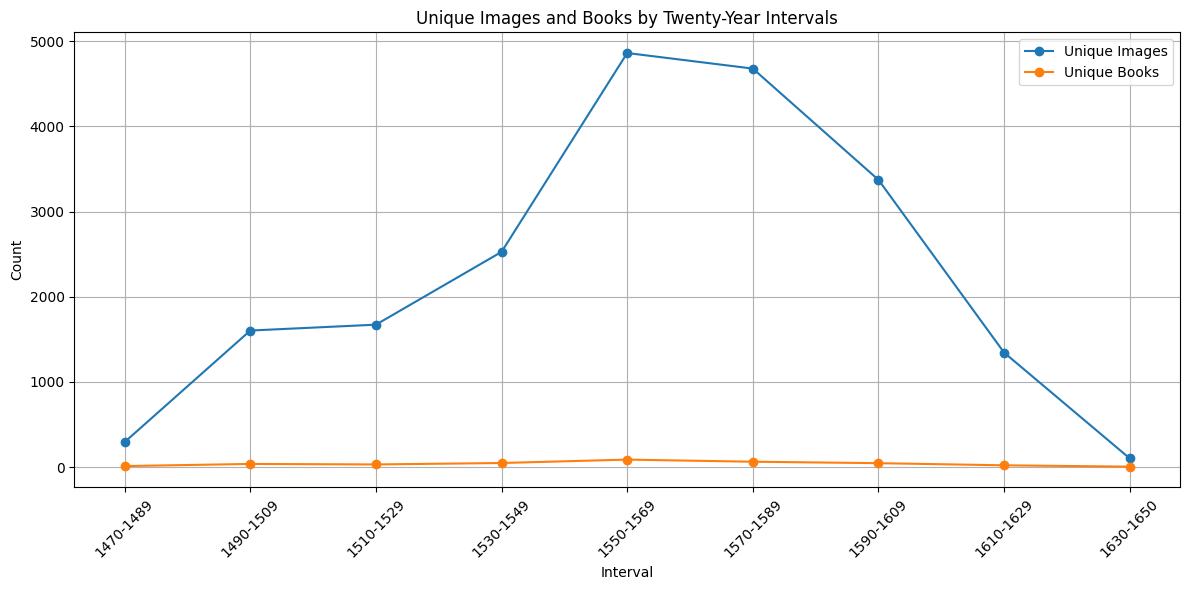

In [5]:
# Ensure 'year' column is numeric
df_images['year'] = pd.to_numeric(df_images['year'], errors='coerce')

# Define the bins and labels
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1650']

# Create interval columns
df_images['interval'] = pd.cut(df_images['year'], bins=bins, labels=labels, right=False)

# Count unique images and books by interval
unique_images = df_images.groupby('interval')['images'].nunique().reset_index(name='unique_images')
unique_books = df_images.groupby('interval')['bid'].nunique().reset_index(name='unique_books')

# Merge the counts into one dataframe
interval_data = pd.merge(unique_images, unique_books, on='interval')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(interval_data['interval'], interval_data['unique_images'], label='Unique Images', marker='o')
plt.plot(interval_data['interval'], interval_data['unique_books'], label='Unique Books', marker='o')
plt.xlabel('Interval')
plt.ylabel('Count')
plt.title('Unique Images and Books by Twenty-Year Intervals')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_24192\2648287724.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images = df_images.groupby('interval')['images'].nunique().reset_index(name='unique_images')
C:\Users\nogas\AppData\Local\Temp\ipykernel_24192\2648287724.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_books = df_images.groupby('interval')['bid'].nunique().reset_index(name='unique_books')


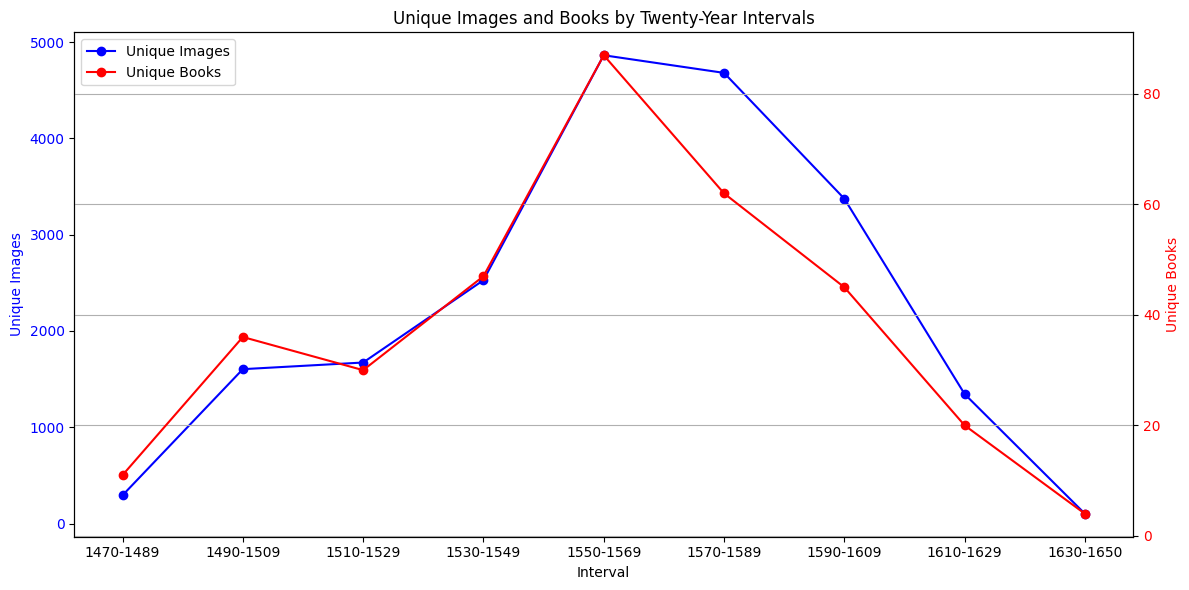

In [6]:
# Define the bins and labels
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1650']

# Create interval columns
df_images['interval'] = pd.cut(df_images['year'], bins=bins, labels=labels, right=False)

# Count unique images and books by interval
unique_images = df_images.groupby('interval')['images'].nunique().reset_index(name='unique_images')
unique_books = df_images.groupby('interval')['bid'].nunique().reset_index(name='unique_books')

# Merge the counts into one dataframe
interval_data = pd.merge(unique_images, unique_books, on='interval')

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot unique images
ax1.plot(interval_data['interval'], interval_data['unique_images'], 'b-o', label='Unique Images')
ax1.set_xlabel('Interval')
ax1.set_ylabel('Unique Images', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for unique books
ax2 = ax1.twinx()
ax2.plot(interval_data['interval'], interval_data['unique_books'], 'r-o', label='Unique Books')
ax2.set_ylabel('Unique Books', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and legend
plt.title('Unique Images and Books by Twenty-Year Intervals')
fig.tight_layout()

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_24192\1226592686.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  images_per_book = df_images.groupby(['interval', 'book'])['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_24192\1226592686.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_images_per_book = images_per_book.groupby('interval')['images'].sum().reset_index(name='total_images')
C:\Users\nogas\AppData\Local\Temp\ipykernel_24192\1226592686.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. P

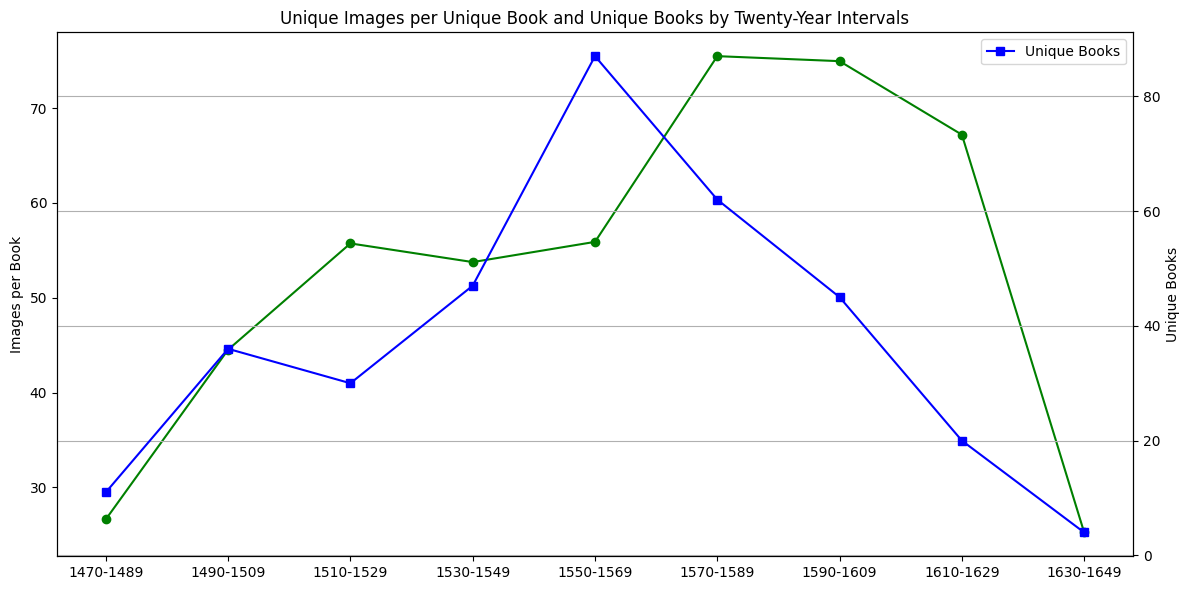

In [10]:
# Define the bins and labels
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create interval column
df_images['interval'] = pd.cut(df_images['year'], bins=bins, labels=labels, right=False)

# Calculate the number of unique images and books per interval
# Unique images per book_id
images_per_book = df_images.groupby(['interval', 'book'])['images'].nunique().reset_index()

# Sum unique images for each interval and count unique books
total_images_per_book = images_per_book.groupby('interval')['images'].sum().reset_index(name='total_images')
unique_books_count = df_images.groupby('interval')['book'].nunique().reset_index(name='unique_books')

# Merge to get the ratio
interval_data = pd.merge(total_images_per_book, unique_books_count, on='interval')
interval_data['images_per_book'] = interval_data['total_images'] / interval_data['unique_books']

# Plot
plt.figure(figsize=(12, 6))

# Primary Y-axis for Images per Book
plt.plot(interval_data['interval'], interval_data['images_per_book'], 'g-o', label='Images per Book')
plt.ylabel('Images per Book')

# Secondary Y-axis for Unique Books
ax2 = plt.gca().twinx()  # Create a second y-axis
ax2.plot(unique_books_count['interval'], unique_books_count['unique_books'], 'b-s', label='Unique Books')
ax2.set_ylabel('Unique Books')

# Adding labels and title
plt.xlabel('Interval')
plt.title('Unique Images per Unique Book and Unique Books by Twenty-Year Intervals')
plt.grid(True)
plt.xticks(rotation=45)

# Legends
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_24192\3481511677.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  images_per_book = df_images.groupby(['interval', 'book'])['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_24192\3481511677.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_images_per_book = images_per_book.groupby('interval')['images'].sum().reset_index(name='total_images')
C:\Users\nogas\AppData\Local\Temp\ipykernel_24192\3481511677.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. P

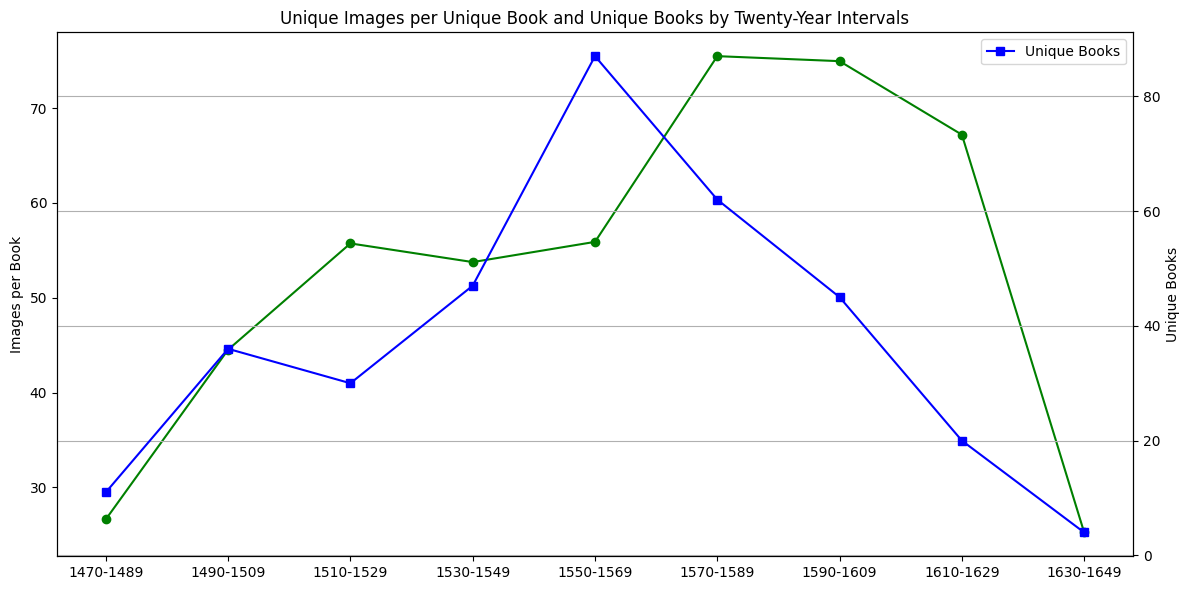

In [9]:
# Define the bins and labels
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create interval column
df_images['interval'] = pd.cut(df_images['year'], bins=bins, labels=labels, right=False)

# Calculate the number of unique images and books per interval
# Unique images per book_id
images_per_book = df_images.groupby(['interval', 'book'])['images'].nunique().reset_index()

# Sum unique images for each interval and count unique books
total_images_per_book = images_per_book.groupby('interval')['images'].sum().reset_index(name='total_images')
unique_books_count = df_images.groupby('interval')['book'].nunique().reset_index(name='unique_books')

# Merge to get the ratio
interval_data = pd.merge(total_images_per_book, unique_books_count, on='interval')
interval_data['images_per_book'] = interval_data['total_images'] / interval_data['unique_books']
# Plot
plt.figure(figsize=(12, 6))

# Primary Y-axis for Images per Book
plt.plot(interval_data['interval'], interval_data['images_per_book'], 'g-o', label='Images per Book')
plt.ylabel('Images per Book')

# Secondary Y-axis for Unique Books
ax2 = plt.gca().twinx()  # Create a second y-axis
ax2.plot(unique_books_count['interval'], unique_books_count['unique_books'], 'b-s', label='Unique Books')
ax2.set_ylabel('Unique Books')

# Adding labels and title
plt.xlabel('Interval')
plt.title('Unique Images per Unique Book and Unique Books by Twenty-Year Intervals')
plt.grid(True)
plt.xticks(rotation=45)

# Legends
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_24192\87781291.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  images_per_book = df_images.groupby(['interval', 'book'])['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_24192\87781291.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_images_per_book = images_per_book.groupby('interval')['images'].sum().reset_index(name='total_images')
C:\Users\nogas\AppData\Local\Temp\ipykernel_24192\87781291.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obs

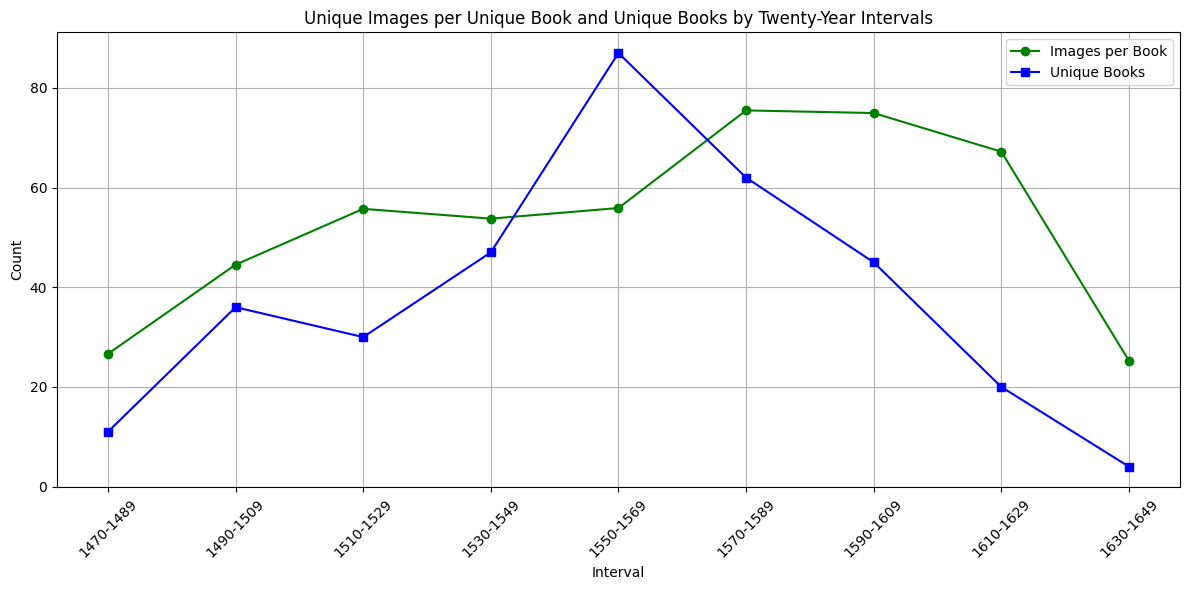

In [11]:
# Define the bins and labels
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create interval column
df_images['interval'] = pd.cut(df_images['year'], bins=bins, labels=labels, right=False)

# Calculate the number of unique images and books per interval
images_per_book = df_images.groupby(['interval', 'book'])['images'].nunique().reset_index()
total_images_per_book = images_per_book.groupby('interval')['images'].sum().reset_index(name='total_images')
unique_books_count = df_images.groupby('interval')['book'].nunique().reset_index(name='unique_books')

# Merge to get the ratio
interval_data = pd.merge(total_images_per_book, unique_books_count, on='interval')
interval_data['images_per_book'] = interval_data['total_images'] / interval_data['unique_books']

# Plot
plt.figure(figsize=(12, 6))

# Plot Images per Book
plt.plot(interval_data['interval'], interval_data['images_per_book'], 'g-o', label='Images per Book')

# Plot Unique Books
plt.plot(unique_books_count['interval'], unique_books_count['unique_books'], 'b-s', label='Unique Books')

# Adding labels and title
plt.xlabel('Interval')
plt.ylabel('Count')
plt.title('Unique Images per Unique Book and Unique Books by Twenty-Year Intervals')
plt.grid(True)
plt.xticks(rotation=45)

# Legends
plt.legend()

plt.tight_layout()
plt.show()